In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import pickle

In [5]:
df_name = pickle.load(open('/content/mc_df (1).pkl', 'rb'))

In [6]:
df_name

,rev_clean,sentiment
0,devotee serum wonder skin always complimented ...,positive
1,woman nearing 50 need help get especially wear...,positive
2,used regenerating serum six month found descri...,positive
3,tried many product totally disappointed one wo...,positive
4,love oil olay primary moisturizer oil olay tot...,negative
...,...,...
28793,although receive product free mean review bias...,positive
28794,smell fresh made usa lot good vitamin,positive
28795,nice product good ingredient like 350 mg formu...,positive
28796,wife pretty much try almost every product figh...,positive


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(df_name.rev_clean, df_name.sentiment, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23038,) (5760,) (23038,) (5760,)


In [11]:
text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=200000)
X_train_text = text_transformer.fit_transform(X_train)
X_test_text = text_transformer.transform(X_test)

In [ ]:
#for our ref it is using something called one vs the rest look into it 
#https://www.kaggle.com/code/satishgunjal/multiclass-logistic-regression-using-sklearn/notebook

In [12]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train_text, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [13]:
k=list(y_test)

In [14]:
k[1]

'positive'

In [15]:
print('Predicted value is =', lm.predict(X_test_text[7]))

print('Actual value from test data is %s ' % (k[7]) )


Predicted value is = ['positive']
Actual value from test data is positive 


In [16]:
score = lm.score(X_test_text, y_test)
print(score)

0.7921875


In [17]:
print(metrics.classification_report(y_test, lm.predict(X_test_text)))

              precision    recall  f1-score   support

    negative       0.79      0.07      0.13       434
     neutral       0.52      0.07      0.13       833
    positive       0.80      1.00      0.89      4493

    accuracy                           0.79      5760
   macro avg       0.70      0.38      0.38      5760
weighted avg       0.76      0.79      0.72      5760



In [23]:
import seaborn as sns 

In [ ]:
# Predict on test data


In [20]:
from sklearn.metrics import confusion_matrix
predictions = lm.predict(X_test_text)
cm_lm = confusion_matrix(y_test, predictions)
cm_lm_df = pd.DataFrame(cm_lm,
                       index = ['positive', 'neutral', 'negative'],
                       columns = ['positive', 'neutral', 'negative'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_lm_df, annot=True)
plt.title('Multiclass TFID Logistic Regression Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show;

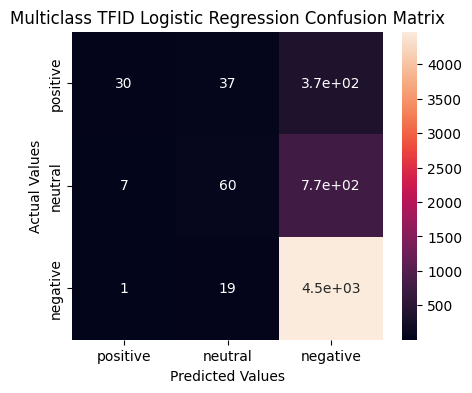

In [25]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_text, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test_text)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.7833333333333333


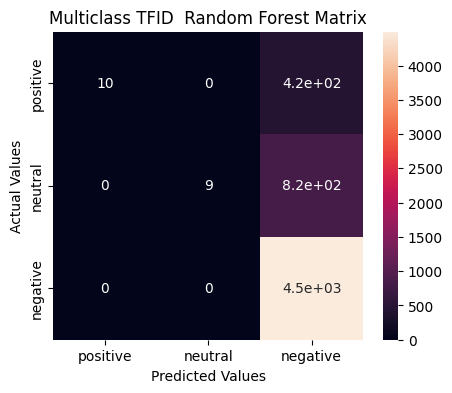

In [29]:
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test_text)
cm_clf = confusion_matrix(y_test, predictions)
cm_clf_df = pd.DataFrame(cm_clf,
                       index = ['positive', 'neutral', 'negative'],
                       columns = ['positive', 'neutral', 'negative'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_clf_df, annot=True)
plt.title('Multiclass TFID  Random Forest Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show;

In [30]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_text, y_train)

MultinomialNB()

In [31]:
y_pred = naive_bayes_classifier.predict(X_test_text)



# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['positive', 'negative', 'neutral']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

accuracy:   0.780
              precision    recall  f1-score   support

    positive       0.00      0.00      0.00       434
    negative       0.00      0.00      0.00       833
     neutral       0.78      1.00      0.88      4493

    accuracy                           0.78      5760
   macro avg       0.26      0.33      0.29      5760
weighted avg       0.61      0.78      0.68      5760

confusion matrix:
[[   0    0  434]
 [   0    0  833]
 [   0    0 4493]]
------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


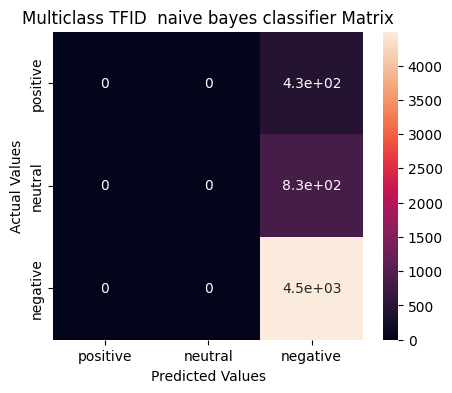

In [33]:
from sklearn.metrics import confusion_matrix
predictions = naive_bayes_classifier.predict(X_test_text)
cm_naive_bayes_classifier = confusion_matrix(y_test, predictions)
cm_naive_bayes_classifier_df = pd.DataFrame(cm_naive_bayes_classifier,
                       index = ['positive', 'neutral', 'negative'],
                       columns = ['positive', 'neutral', 'negative'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_naive_bayes_classifier_df, annot=True)
plt.title('Multiclass TFID  naive bayes classifier Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show;

In [ ]:
df_name.sentiment.unique()